In [ ]:
import pandas as pd

In [ ]:
lista = ['TSDem', 'TB_SEC_III', 'TB_SEC_IV', 'TB_SEC_VI', 'TB_SEC_X', 'TB_SEC_XII', 'TB_SEC_XIII', 'TB_SEC_XIII.I', 'TB_SEC_XIV', 'TB_SEC_XIV_2',
        'TB_SEC_XV', 'TB_SEC_XVI', 'TB_SEC_XVII', 'TB_SEC_FIN_ENTREV'] #, TD_VD
len(lista)

14

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
'/content/drive/MyDrive/ProyectoAnalisisDS/data'

'/content/drive/MyDrive/ProyectoAnalisisDS/data'

In [ ]:
df_maestro2 = pd.read_csv('/content/drive/MyDrive/ProyectoAnalisisDS/data/TB_VD.csv',sep=',', encoding='latin-1')

for i in range (len(lista)):
  ruta = ('/content/drive/MyDrive/ProyectoAnalisisDS/data/'+ str(lista[i])+ '.csv')
  df_ = pd.read_csv(ruta ,sep=',', encoding='latin-1')
  df_maestro2 = df_maestro2.merge(df_, on = ['ID_VIV', 'ID_PER', 'UPM',
                          'VIV_SEL', 'HOGAR', 'N_REN',
                          'DOMINIO', 'CVE_ENT', 'NOM_ENT',
                          'CVE_MUN', 'NOM_MUN',
                          'FAC_VIV', 'FAC_MUJ', 'ESTRATO',
                          'UPM_DIS', 'EST_DIS'], how = 'left')


<ipython-input-11-d76816423191>:6: FutureWarning: Passing 'suffixes' which cause duplicate columns {'T_INSTRUM_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_maestro2 = df_maestro2.merge(df_, on = ['ID_VIV', 'ID_PER', 'UPM',
<ipython-input-11-d76816423191>:6: FutureWarning: Passing 'suffixes' which cause duplicate columns {'T_INSTRUM_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_maestro2 = df_maestro2.merge(df_, on = ['ID_VIV', 'ID_PER', 'UPM',
<ipython-input-11-d76816423191>:6: FutureWarning: Passing 'suffixes' which cause duplicate columns {'T_INSTRUM_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_maestro2 = df_maestro2.merge(df_, on = ['ID_VIV', 'ID_PER', 'UPM',
<ipython-input-11-d76816423191>:5: DtypeWarning: Columns (25,35,55,101,168) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ = pd.read_csv(ruta ,sep=',', encoding='latin-1')
<ip

In [ ]:
df_maestro2.shape

(110127, 848)

In [ ]:
df_maestro2.to_csv('/content/drive/MyDrive/ProyectoAnalisisDS/data/DF_MAESTRO.csv')

## Quitar con muchos NANs

In [ ]:
nan_var = []

for i in range (848):
  nan_var.append(df_maestro2.iloc[:, i].isna().sum())

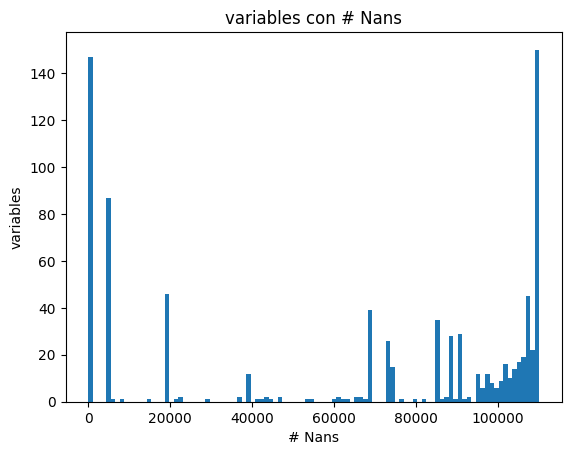

In [ ]:
import matplotlib.pyplot as plt

plt.hist(nan_var, bins =100)

plt.title('variables con # Nans')

plt.xlabel('# Nans')
plt.ylabel('variables')

plt.show();

In [ ]:
for i in range(len(df_maestro2.columns)):
  if df_maestro2.iloc[:, i].isna().sum() > 80000:
    df_maestro2 = df_maestro2.drop(df_maestro2.iloc[0, i], axis = 1)

KeyError: '[nan] not found in axis'